19127216

- What is the selected topic?
- Why is the problem(s) interesting and challenging?
- Goals set by the group
- Dataset(s) for the problems
- The statistical information of the data
- Data preprocessing
- Visualization
- Hypothesis


# **Load libraries**

In [38]:
# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, mannwhitneyu,  kruskal

# **Load dataset**

In [40]:
df = pd.read_csv('/content/drive/My Drive/DSApplication/Midterm/BRCA.csv')
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [43]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


*This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:*

- Patient_ID: unique identifier id of a patient
- Age: age at diagnosis (Years)
- Gender: Male/Female
- Protein1, Protein2, Protein3, Protein4: expression levels (undefined units)
- Tumour_Stage: I, II, III
- Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma
- ER status: Positive/Negative
- PR status: Positive/Negative
- HER2 status: Positive/Negative
- Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
- Date_of_Surgery: Date on which surgery was performed (in DD-MON-YY)
- Date_of_Last_Visit: Date of last visit (in DD-MON-YY) can be null, in case the patient didn’t visit again after the surgery]
- Patient_Status: Alive/Dead can be null, in case the patient didn’t visit again after the surgery and there is no information available whether the patient is alive or dead.

# **Uniques & Nulls**

In [44]:
#unique vals
df.nunique().sort_values(ascending=False)

Patient_ID            334
Protein2              334
Protein3              334
Protein1              333
Protein4              333
Date_of_Last_Visit    285
Date_of_Surgery       181
Age                    57
Surgery_type            4
Tumour_Stage            3
Histology               3
Gender                  2
HER2 status             2
Patient_Status          2
ER status               1
PR status               1
dtype: int64

In [45]:
# null values
df.isnull().sum().sort_values(ascending=False)

Date_of_Last_Visit    24
Patient_Status        20
Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
dtype: int64

In [46]:
df_dup = df[df.duplicated()]
print("you have {} duplicate rows".format(len(df_dup)))

you have 6 duplicate rows


In [47]:
# Check for rows with only null values in all features
null_rows = df[df.isnull().all(axis=1)]

# **Statistical Infor**

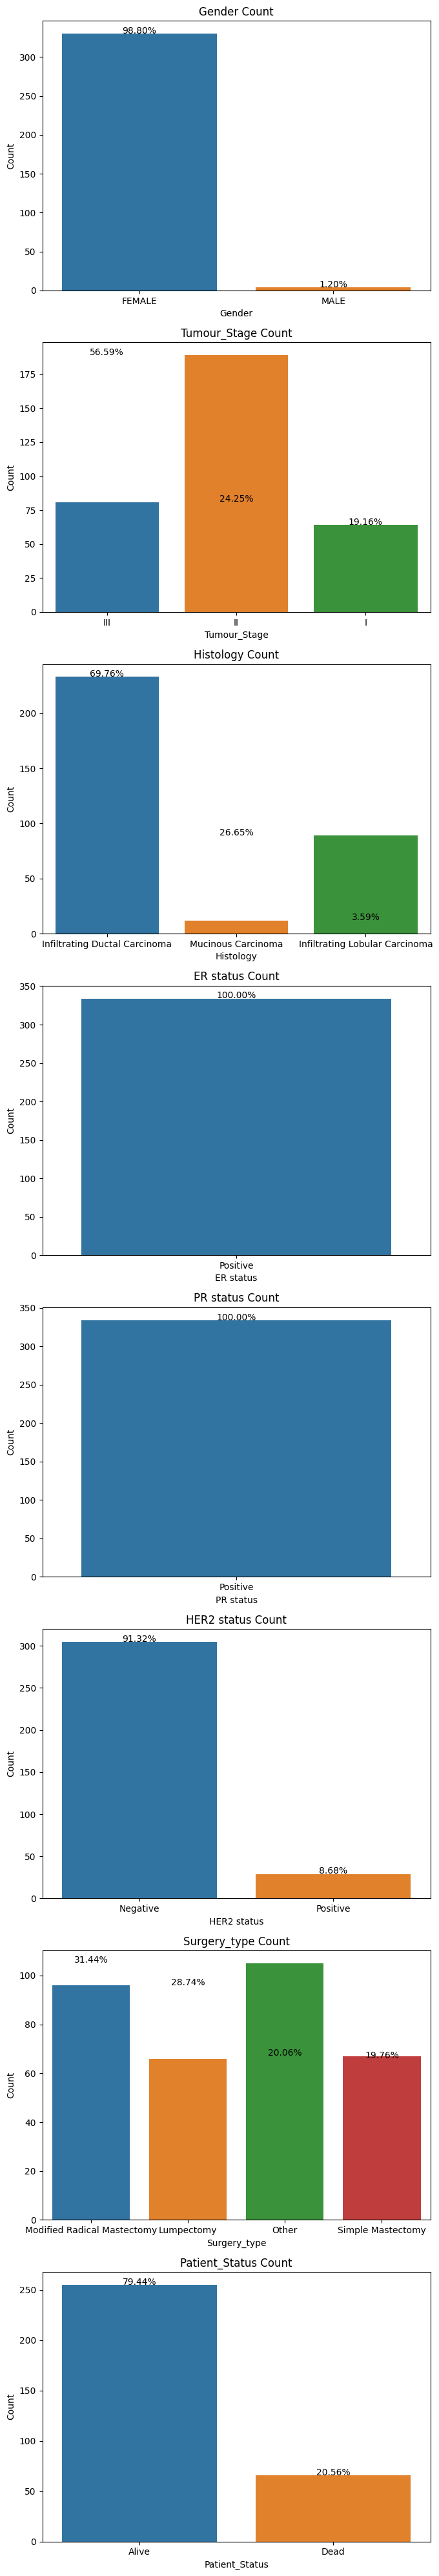

In [48]:
# Get the list of categorical variables
categorical_vars = df.select_dtypes(include='object').columns.tolist()
categorical_vars = [col for col in categorical_vars if col != 'Patient_ID' and 'Date' not in col]


# Create subplots for countplots
num_plots = len(categorical_vars)
fig, axes = plt.subplots(num_plots, 1, figsize=(7, 5 * num_plots))

# Calculate ratio and plot countplot for each categorical variable
for i, var in enumerate(categorical_vars):
    ax = axes[i]
    
    # Calculate count and ratio of each value
    value_counts = df[var].value_counts()
    value_ratio = value_counts / value_counts.sum()
    
    # Create countplot
    sns.countplot(data=df, x=var, ax=ax)
    ax.set_title(f'{var} Count')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    
    # Add text annotations with the ratio on top of each bar
    for j, count in enumerate(value_counts):
        ratio = value_ratio[j]
        ax.text(j, count + 0.1, f'{ratio:.2%}', ha='center')
    
plt.tight_layout()
plt.show()

In [49]:
# List of numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create subplots for histograms
num_plots = len(numerical_vars)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 6 * num_plots))

# Calculate ratio and plot histogram for each numerical variable
for i, var in enumerate(numerical_vars):
    ax = axes[i]
    
    # Calculate ratio by value
    value_counts = df[var].value_counts(normalize=True)
    
    # Create histogram
    sns.histplot(data=df, x=var, ax=ax, bins=10)
    ax.set_title(f'{var} Histogram')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    
    # Add text annotations with the ratio on top of each bar
    for j, count in enumerate(value_counts):
        ax.text(j, count + 0.1, f'{count:.2%}', ha='center')
    
plt.tight_layout()
plt.show();

<ipython-input-49-765fd1a3ea0e>:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


# **Preprocessing**

In [50]:
# Remove rows with only null values from the DataFrame
df = df.dropna(how='all')

# **Hypothesis**
Statistical methods used to test a hypothesis or an argument. It is to test whether the resulting difference is by chance. We make scientific decisions by using data to support a business decision. Either the means for the two groups or the ratios for the two groups are compared. Two things with the same property can be compared.

Example: Has the average daily time spent by users in the application increased after the interface change in the mobile application?


*  Group 1: Users before the interface change Group A \
*  Group 2: Users after the interface change Group B 

*  Hypothesis 0: There is no time difference between group A and group B. (tested) \
*  Hypothesis 1: There is a difference between group A and group B. 


Let's say that the time has increased as a result of the change, but it still needs to be tested because we take a sample and we see it like this in every sample.

![Hypo](/content/drive/MyDrive/DSApplication/Midterm/download.png)

H0: It is the null hypothesis. The situation we are going to test is in the H0 hypothesis. There is no difference between the two groups. We can evaluate whether there is a difference between the two groups according to the H0 rejection or no rejection status.

## Hypothesis Steps
1. Build hypotheses

2. Assumption check

2.1. Normality assumption: The distribution of the relevant groups is normal. (The mean of the samples must be in accordance with the normal distribution). Again, we have to test the hypothesis. Shapiro tests whether the distribution of a variable is normal.

2.2. Variance homogeneity: The distribution of the variances of the two groups is similar to each other: Levene performs the control of variance homogeneity test.

3. Implementation of the hypothesis

3.1. Independent two-sample t-test (parametric test) if assumptions are provided.

3.2. Mannwhitneyu test if assumptions are not provided (non-parametric test)

4. Interpret results based on p-value Note:

Direct number 2 if normality is not achieved. If the assumption is not homogeneous, an argument is entered at number 1.
It may be useful to perform outlier analysis and correction before examining normality

## *Is there a statistically significant difference between the mean age of patients who lived and did not survive after the surgery?*

In [51]:
df.groupby("Patient_Status").agg({"Age": "mean"})

,Age
Patient_Status,
Alive,58.803922
Dead,59.151515


1. Build hypotheses

H0: M1 = M2 there is no statistically significant difference between living and non-living.

H1: M1 != M2 there is a significant difference.

2. Assumption check

2.1. Normality assumption

`H0: Normal distribution assumption is provided. \
H1: ... is not provided.`



In [52]:
test_stat, pvalue = shapiro(df.loc[df["Patient_Status"] == "Alive", "Age"])
print("Test Stat = %.4f, p-value = %.4f" %(test_stat, pvalue))

Test Stat = 0.9785, p-value = 0.0007


p-value is lower than 0.05 so H0 hypothesis is rejected. The assumption of normality is not provided.

In [53]:
test_stat, pvalue = shapiro(df.loc[df["Patient_Status"] == "Dead", "Age"])
print("Test Stat = %.4f, p-value = %.4f" %(test_stat, pvalue))

Test Stat = 0.9851, p-value = 0.6154


p-value is higher than 0.05 so H0 hypothesis cannot be rejected.

2.2. Variance homogeneity

`H0: Variances are homogeneous. \
H1: Variances are not homogeneous.`

In [54]:
test_stat, pvalue = levene(df.loc[df["Patient_Status"] == "Alive", "Age"],
                           df.loc[df["Patient_Status"] == "Dead", "Age"])
print("Test Stat = %.4f, p-value = %.4f" %(test_stat, pvalue))

Test Stat = 0.0868, p-value = 0.7685


p-value is higher than 0.05 so, H0 cannot be rejected. That is, the variances are homogeneous.

**We should use a non-parametric test because normality is not ensured.**

3. Implementation of the hypothesis

3.1. Independent two-sample t-test (parametric test) if assumptions are provided.

3.2. Mannwhitneyu test if assumptions are not provided (non-parametric test)

In [55]:
test_stat, pvalue = mannwhitneyu(df.loc[df["Patient_Status"] == "Alive", "Age"],
                                 df.loc[df["Patient_Status"] == "Dead", "Age"])
print("Test Stat = %.4f, p_value = %.4f" % (test_stat, pvalue))

Test Stat = 8193.5000, p_value = 0.7422


4. Interpret results based on p-value

p-value is higher than 0.05 so, H0 cannot be rejected. There is no statistically significant difference between alive and dead.

# **ANOVA**
It is used to compare the mean of more than two groups. When comparing these groups, at least one of them is compared as different. Why do we compare all of them at once and not one by one? Because error evaluation processes will not be healthy as a result of the evaluation of all of them one by one and the result of one comparison.

## ANOVA Steps

1. Build hypotheses

H0: M1 = M2 = M3 = … There is no significant difference between group means.
H1: … there is a difference.
2. Assumption check

2.1. Normality assumption: The distribution of the relevant groups is normal. (The mean of the samples must be in accordance with the normal distribution). Again, we have to test the hypothesis. Shapiro tests whether the distribution of a variable is normal.

2.2. Variance homogeneity: The distribution of the variances of the two groups is similar to each other: Levene performs the control of variance homogeneity test.

3. Implementation of the hypothesis

3.1. One way anova test if the assumption is provided.

3.2. Kruskal test if the assumption is not provided.

4. Interpret results based on p-value

## *Is there a statistically significant difference between the mean age of the patients and the stage of their cancer?*

In [56]:
df.groupby("Tumour_Stage").agg({"Age": "mean"})

,Age
Tumour_Stage,
I,62.359375
II,59.052910
III,55.753086


1. Build hypotheses

H0: m1 = m2 = m3, There is no significant difference between group averages.
H1: ..., There is a significant difference between group averages.

2. Assumption check

2.1. Assumption of normality

H0: The assumption of normal distribution is provided.
H1: The assumption of normal distribution is not provided.

In [57]:
# We have converted the classes of a categorical variable into an object to visit.
for group in list(df["Tumour_Stage"].unique()):
    pvalue = shapiro(df.loc[df["Tumour_Stage"] == group, "Age"])[1] # [1] because we want the p-value (test-stat[0], pvalue[1]
    print(group, "p-value: %.4f" %pvalue)

III p-value: 0.0044
II p-value: 0.0219
I p-value: 0.4756


According to these values, H0 is rejected because III and II pvalues are less than < 0.05. So it is not a normal distribution.

2.2. Assumption of homogeneity of variance

H0: variance homogeneity assumption is provided. \
H1: the assumption of homogeneity of variance is not provided.

In [58]:
test_stat, pvalue = levene(df.loc[df["Tumour_Stage"] == "III", "Age"],
                           df.loc[df["Tumour_Stage"] == "II", "Age"],
                           df.loc[df["Tumour_Stage"] == "I", "Age"])

print("Test State: %.4f, pvalue: %.4f" %(test_stat, pvalue))

Test State: 1.2291, pvalue: 0.2939


p-value higher than 0.05. So, H0 cannot be rejected. It provides variance homogeneity. But we already rejected the first assumption, so we will use non-parametric test.

3. Implementation of the hypothesis

One way anova test if the assumption is provided. \
Kruskal test if the assumption is not provided.

In [59]:
kruskal(df.loc[df["Tumour_Stage"] == "III", "Age"],
        df.loc[df["Tumour_Stage"] == "II", "Age"],
        df.loc[df["Tumour_Stage"] == "I", "Age"])

KruskalResult(statistic=10.321092548098187, pvalue=0.0057385640006678874)

H0 is rejected because it has a p value less than 0.05. That is, there is a significant difference between the groups.

**There is a difference, but which group is causing it?**

In [60]:
from statsmodels.stats.multicomp import MultiComparison
comparison = MultiComparison(pd.to_numeric(df['Age'], errors='coerce'), df['Tumour_Stage'])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     I     II  -3.3065 0.1766  -7.6703  1.0573  False
     I    III  -6.6063 0.0063 -11.6526 -1.5599   True
    II    III  -3.2998 0.1295   -7.307  0.7073  False
-----------------------------------------------------


The difference from the group with the smallest p-adj value is indicated. So, it can be said that there is a significant difference in the age of the patients between stage I breast cancer and stage II breast cancer.